Viewing data

# Download the dataset

In [8]:
import numpy as np
import scipy.ndimage
from matplotlib import pyplot as plt
from google.colab import files

!gdown --id 172VpjfHhrWpt5NpENXHtuxsje_yFHLoW


Downloading...
From: https://drive.google.com/uc?id=172VpjfHhrWpt5NpENXHtuxsje_yFHLoW
To: /content/sample_dataset.npy
101MB [00:00, 178MB/s] 


# View the dataset
Shows the longest spectrograms in the dataset

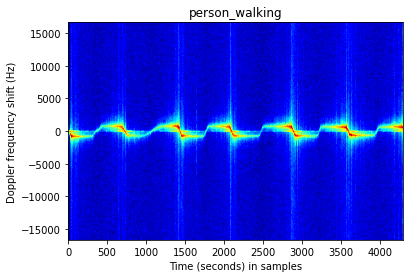

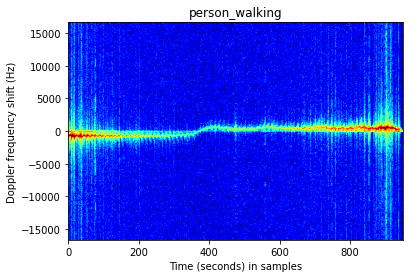

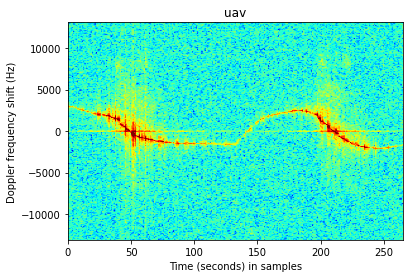

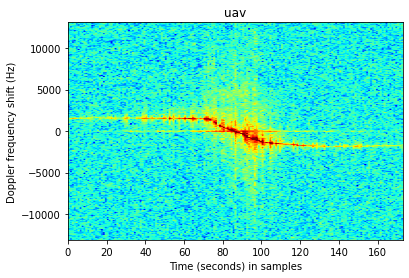

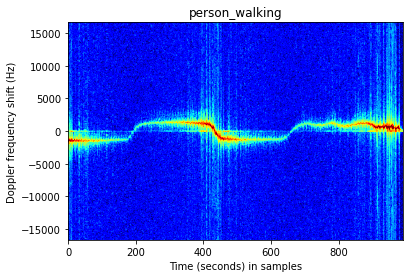

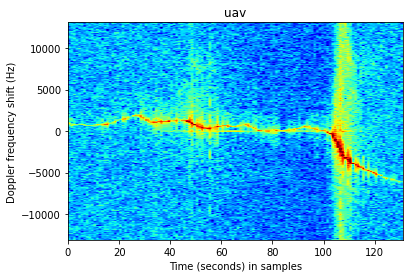

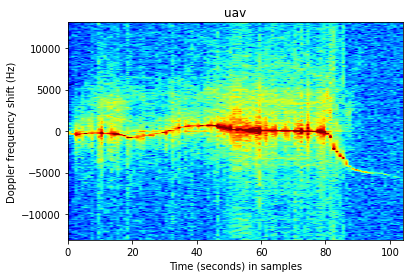

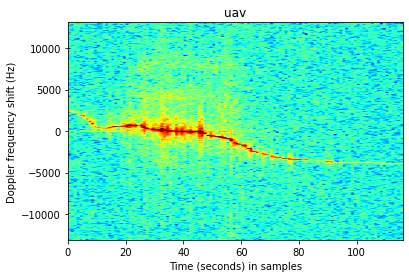

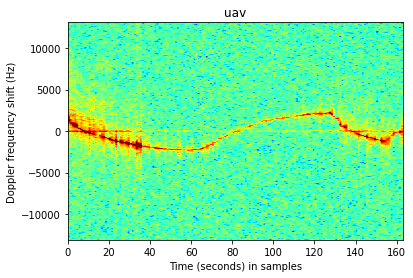

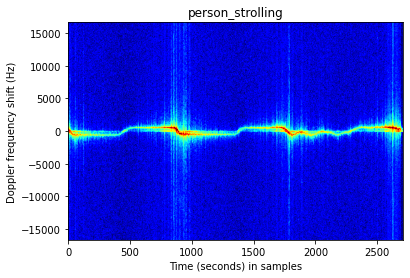

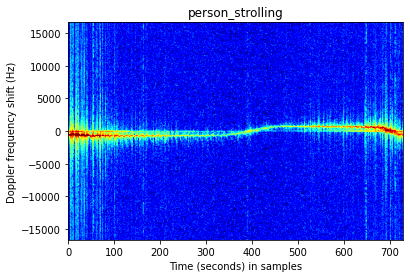

In [19]:
filename = "sample_dataset.npy"
signatures = np.load(filename, allow_pickle=True)

for signature in signatures:
    if (len(signature['snr_db']) > 500) or (signature['class_name']=="uav" and len(signature['snr_db']) > 100):
        arr = signature['signature']
        arr = 20 * np.log10(np.abs(arr)).transpose()
        prf = signature['radar_parameters']['prf']
        plt.imshow(arr, cmap='jet', aspect='auto', vmax=np.max(arr) - 20, vmin=np.max(arr) - 70,
                      extent=[0, arr.shape[1], -int(prf/2), int(prf / 2)])
        plt.title(signature['class_name'])
        plt.autoscale()
        # plt.colorbar(axdata)
        plt.xlabel('Time (seconds) in samples')
        plt.ylabel('Doppler frequency shift (Hz)')
        plt.show()